In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout


In [2]:
# mnist=tf.keras.datasets.mnist
# (xtrain,ytrain),(xtest,ytest)=mnist.load_data()
import pandas as pd
train_data=pd.read_csv('LP-IV-datasets//MNIST(Ass2&3)/mnist_train.csv')
xtrain=train_data.drop('label',axis=1).values
ytrain=train_data['label']

test_data=pd.read_csv('LP-IV-datasets//MNIST(Ass2&3)/mnist_test.csv')
xtest=test_data.drop('label',axis=1).values
ytest=test_data['label']



In [3]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)
xtrain=xtrain/255.0
xtest=xtest/255.0

In [4]:
model=Sequential([
    Conv2D(20,kernel_size=(3,3),input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 20)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3380)              0         
                                                                 
 dense (Dense)               (None, 128)               432768    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [5]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=11,validation_data=(xtest,ytest))

Epoch 1/11
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5357 - accuracy: 0.8463 - val_loss: 0.2223 - val_accuracy: 0.9341
Epoch 2/11
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2450 - accuracy: 0.9273 - val_loss: 0.1616 - val_accuracy: 0.9525
Epoch 3/11
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1950 - accuracy: 0.9420 - val_loss: 0.1330 - val_accuracy: 0.9604
Epoch 4/11
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1681 - accuracy: 0.9503 - val_loss: 0.1129 - val_accuracy: 0.9665
Epoch 5/11
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1483 - accuracy: 0.9566 - val_loss: 0.1059 - val_accuracy: 0.9682
Epoch 6/11
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1354 - accuracy: 0.9596 - val_loss: 0.0959 - val_accuracy: 0.9707
Epoch 7/11
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1254 - accuracy: 0.9620 - val_loss: 0.0903 -

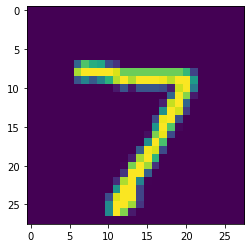

In [6]:
image=xtest[0]
plt.imshow(image)
plt.show()

In [7]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
pred=model.predict([image])
print("Predicted :",np.argmax(pred))

1/1 [==============================] - 1s 552ms/step
Predicted : 7
